# 【問題1】練習のために特徴量の選択

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/Users/suzukiyuuta/Downloads/train.csv')#教師データを読み込む
display(df.head())
display(df.info())
display(df.describe())


# def null_search(df_train):
#     for i in df_train.columns:
#         print("■■■  " + i )
#         print("NULL数:" + str(df_train[i].isnull().sum() ))#+
# #                  "　　　　NULL率:" + str((df_train[i].isnull().sum()/len(df_train)).round(3)) +
# #                  "    データの種類数:" + str(df_train[i].value_counts().count()))
# null_search(df)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

None

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

# 【問題2】線形回帰による推定と評価
<br>
平均二乗誤差による線形回帰

In [3]:
df_X_ori = df.loc[:,['GrLivArea','YearBuilt']]
display(df_X_ori.describe())
df_Y_ori = df.loc[:,['SalePrice']]
display(df_Y_ori.describe())

df_X, X_test, df_Y, y_test = train_test_split(df_X_ori.values,df_Y_ori.values)
df_X

GrLivArea    YearBuilt
count  1460.000000  1460.000000
mean   1515.463699  1971.267808
std     525.480383    30.202904
min     334.000000  1872.000000
25%    1129.500000  1954.000000
50%    1464.000000  1973.000000
75%    1776.750000  2000.000000
max    5642.000000  2010.000000

SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000

array([[1386, 1978],
       [1221, 2004],
       [1208, 1977],
       ...,
       [1034, 1940],
       [1317, 1920],
       [1198, 1920]])

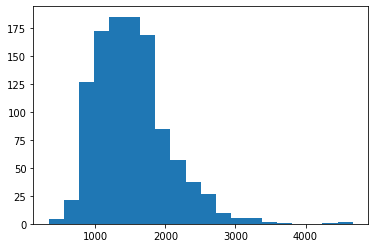

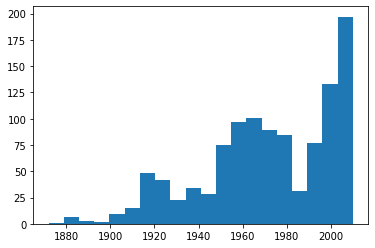

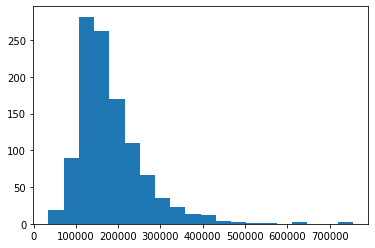

In [4]:
import matplotlib.pyplot as plt
plt.hist(df_X[:, 0], bins=20)
plt.show()
# 対数に置き換え正規化

import matplotlib.pyplot as plt
plt.hist(df_X[:, 1], bins=20)
plt.show()
# 築年数に置き換え正規化

import matplotlib.pyplot as plt
plt.hist(df_Y[:, 0], bins=20)
plt.show()
# 対数に置き換え

In [5]:
df_x_g = df_X[:, 0] #床面積を抜き出す(教師データ)
# display(df_x_g)
log_df_x_g = pd.DataFrame(np.log(df_x_g))#対数変換
# display(log_df_x_g.describe())
print(type(log_df_x_g))

X_test_g = X_test[:, 0] #床面積を抜き出す（テストデータ）
# display(X_test_g)
log_X_test_g = pd.DataFrame(np.log(X_test_g))#対数変換
# display(log_X_test_g.describe())
print(type(log_X_test_g))

df_x_y = df_X[:, 1] #建設年を抜き出す(教師データ)
# display(df_x_y)
df_x_y_con = 2020 - pd.DataFrame(df_x_y)
# display(df_x_y_con)
print(type(df_x_y_con))

X_test_y = X_test[:, 1] #建設年を抜き出す（テストデータ）
# print(X_test[:, 1].shape)
# display(X_test_y)
X_test_y_con = 2020 - pd.DataFrame(X_test_y)
# display(X_test_y_con)
print(type(X_test_y_con))

log_df_y = pd.DataFrame(np.log(df_Y)) #対数変換
# display(log_df_y.describe())
print(type(log_df_y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
#特徴量を結合
df_X_con = pd.concat([log_df_x_g, df_x_y_con], axis=1,)
df_X_con

X_test_con = pd.concat([log_X_test_g, X_test_y_con], axis=1,)
X_test_con


#特徴量それぞれ標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_X_con)
df_X_con_std_train = scaler.transform(df_X_con)
# print(df_X_con)

scaler.fit(X_test_con)
X_test_con_std = scaler.transform(X_test_con)
# print(type(X_test_con_std))

# scaler.fit(log_df_y)
# df_Y_con_std = scaler.transform(log_df_y)
# print(type(df_Y_con_std))

#display(df_X_con_std.describe())
# df_X_con_std_pd = pd.DataFrame(df_X_con_std, columns=["GrLivArea", "YearBuilt"])
# df_X_con_std_pd.describe()# df_X_con_std_pd = pd.DataFrame(df_X_con_std, columns=["GrLivArea", "YearBuilt"])
# df_X_con_std_pd.describe()
# df_Y_con_std_pd = pd.DataFrame(df_Y_con_std, columns=["SalePrice"])
# df_Y_con_std_pd.describe()

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(df_X_con_std_train, log_df_y)

log_y_pred = model.predict(X_test_con_std)


# print(log_y_pred)

y_pred = np.exp(log_y_pred)
print("平均２乗誤差：{}".format(mean_squared_error(y_test, y_pred)))
print("決定係数：{}".format(r2_score(y_test, y_pred)))
# print(y_pred)
# print(model.coef_[0])  #回帰変数の表示
# print(model.intercept_)  #回帰直線の切片
# # print(model.get_params())  #パラメータの取得
# # print(model.predict(X_test_con))  #予測値の表示
# # print(model.score(X_test_con,pd.DataFrame(np.log(y_test))))  #決定係数の表示

# print(df_X_con_std_train.shape)
# print(type(df_X_con_std_train))
# print(log_df_y.shape)


平均２乗誤差：2719512831.7015734
決定係数：0.5614093428768481


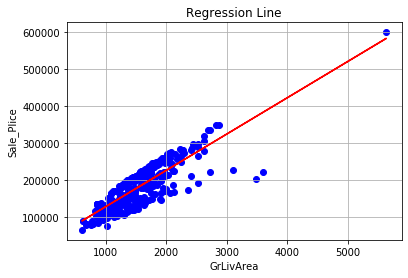

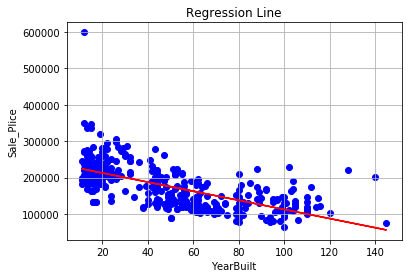

In [38]:
plt.scatter(X_test_g, y_pred, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
x = X_test_g
y = y_pred
a, b = np.polyfit(x, y, 1)
# フィッティング直線
y2 = a * x + b
plt.plot(x, y2,color='red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('GrLivArea') # x軸のラベル
plt.ylabel('Sale_Plice')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()

plt.scatter(X_test_y_con, y_pred, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
x1 = X_test_y_con.values
x1 = x1.reshape(365)
y1 = y_pred

a1, b1 = np.polyfit(x1, y1, 1)
# フィッティング直線
y2_1 = a1 * x1 + b1
plt.plot(x1, y2_1, color='red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('YearBuilt') # x軸のラベル
plt.ylabel('Sale_Plice')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()   

# 【問題3】手法の比較

In [ ]:
SVM

In [76]:
from sklearn.svm import SVR
model2 = SVR(gamma='auto')
model2.fit(df_X_con_std_train, log_df_y)

log_y_pred = model2.predict(X_test_con_std)
# print(log_y_pred)

y_pred = np.exp(log_y_pred)
print("平均２乗誤差：{}".format(mean_squared_error(y_test, y_pred)))
print("決定係数：{}".format(r2_score(y_test, y_pred)))

平均２乗誤差：1884552446.816715
決定係数：0.6960679551141429


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


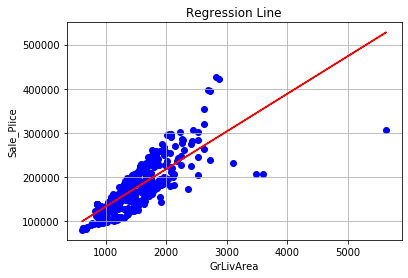

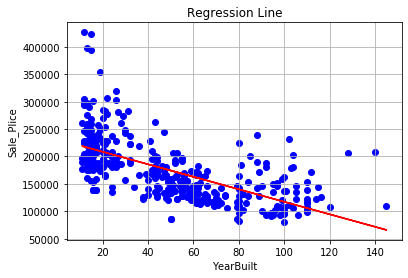

In [52]:
plt.scatter(X_test_g, y_pred, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
x = X_test_g
y = y_pred
a, b = np.polyfit(x, y, 1)
# フィッティング直線
y2 = a * x + b
plt.plot(x, y2,color='red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('GrLivArea') # x軸のラベル
plt.ylabel('Sale_Plice')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()

plt.scatter(X_test_y_con, y_pred, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
x1 = X_test_y_con.values
x1 = x1.reshape(365)
y1 = y_pred

a1, b1 = np.polyfit(x1, y1, 1)
# フィッティング直線
y2_1 = a1 * x1 + b1
plt.plot(x1, y2_1, color='red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('YearBuilt') # x軸のラベル
plt.ylabel('Sale_Plice')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()   

In [ ]:
ランダムフォレスト

In [77]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(max_depth=10, random_state=0)
model4.fit(df_X_con_std_train,log_df_y)
log_y_pred = model4.predict(X_test_con_std)
# print(log_y_pred)

y_pred = np.exp(log_y_pred)
print("平均２乗誤差：{}".format(mean_squared_error(y_test, y_pred)))
print("決定係数：{}".format(r2_score(y_test, y_pred)))

平均２乗誤差：2124191946.4056022
決定係数：0.6574199868559489


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


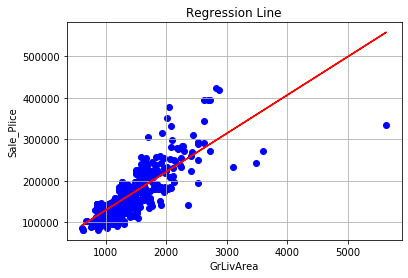

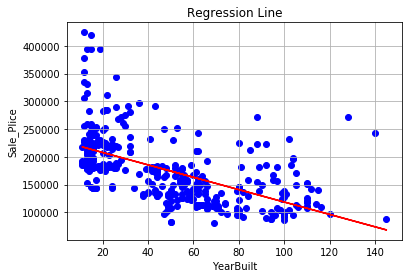

In [69]:
plt.scatter(X_test_g, y_pred, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
x = X_test_g
y = y_pred
a, b = np.polyfit(x, y, 1)
# フィッティング直線
y2 = a * x + b
plt.plot(x, y2,color='red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('GrLivArea') # x軸のラベル
plt.ylabel('Sale_Plice')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()

plt.scatter(X_test_y_con, y_pred, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
x1 = X_test_y_con.values
x1 = x1.reshape(365)
y1 = y_pred

a1, b1 = np.polyfit(x1, y1, 1)
# フィッティング直線
y2_1 = a1 * x1 + b1
plt.plot(x1, y2_1, color='red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('YearBuilt') # x軸のラベル
plt.ylabel('Sale_Plice')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()   

In [ ]:
決定木

In [78]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(max_depth = 10)
model3.fit(df_X_con_std_train,log_df_y)

log_y_pred = model3.predict(X_test_con_std)
# print(log_y_pred)

y_pred = np.exp(log_y_pred)
print("平均２乗誤差：{}".format(mean_squared_error(y_test, y_pred)))
print("決定係数：{}".format(r2_score(y_test, y_pred)))

平均２乗誤差：2495875796.777748
決定係数：0.5974765064367797


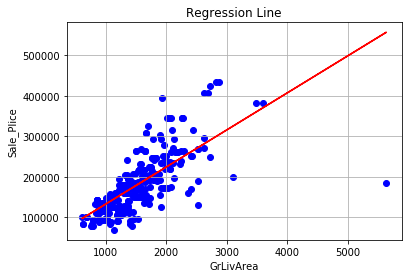

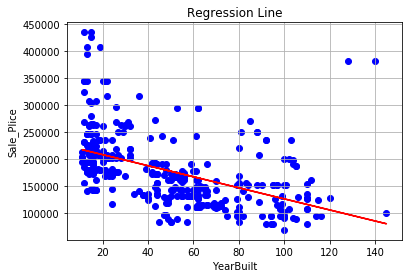

In [67]:
plt.scatter(X_test_g, y_pred, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
x = X_test_g
y = y_pred
a, b = np.polyfit(x, y, 1)
# フィッティング直線
y2 = a * x + b
plt.plot(x, y2,color='red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('GrLivArea') # x軸のラベル
plt.ylabel('Sale_Plice')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()

plt.scatter(X_test_y_con, y_pred, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
x1 = X_test_y_con.values
x1 = x1.reshape(365)
y1 = y_pred

a1, b1 = np.polyfit(x1, y1, 1)
# フィッティング直線
y2_1 = a1 * x1 + b1
plt.plot(x1, y2_1, color='red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('YearBuilt') # x軸のラベル
plt.ylabel('Sale_Plice')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show() 

In [102]:
mse = np.zeros(4)
mse[0] = 2719512831.7015734
mse[1] = 1884552446.816715
mse[2] = 2124191946.4056022
mse[3] = 2411506459.4097524
mse = pd.DataFrame(mse)
print(mse)

r2 = np.zeros(4)
r2[0] = 0.5614093428768481
r2[1] = 0.6960679551141429
r2[2] = 0.6574199868559489
r2[3] = 0.5974765064367797
r2 = pd.DataFrame(r2)

evaluation = pd.concat([mse, r2], axis=1,)
print(evaluation)
evaluation.columns = ['MSE','R2']
evaluation.index = ['線形回帰','SVM','ランダムフォレスト','決定木']
evaluation

              0
0  2.719513e+09
1  1.884552e+09
2  2.124192e+09
3  2.411506e+09
              0         0
0  2.719513e+09  0.561409
1  1.884552e+09  0.696068
2  2.124192e+09  0.657420
3  2.411506e+09  0.597477


MSE        R2
線形回帰       2.719513e+09  0.561409
SVM        1.884552e+09  0.696068
ランダムフォレスト  2.124192e+09  0.657420
決定木        2.411506e+09  0.597477

In [ ]:
MSE,R2共にSVMがもっとも優秀だが、予測としては性能がイマイチで特徴量が適切に与えられていない印象
グラフとしては線形回帰が最もまとまりがあり、素直な予測を出力する印象、決定木、ランダムフォレストは出力結果の分解能を増やした結果、
過剰最適してしまい結果が伴わなかった印象。